In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [3]:
# read csv file
df = pd.read_csv('/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves/TIC_1232360.csv')
df

,cleaned_time,detrended_flux,trend_time,trend_flux,raw_time,raw_flux
0,1517.936742,1.006893,1517.936742,0.999730,1517.936742,1.006621
1,1517.940909,1.006908,1517.940909,0.999604,1517.938131,1.006908
2,1517.943687,1.004701,1517.943687,0.999566,1517.939520,1.008569
3,1517.946465,1.005554,1517.946465,0.999477,1517.940909,1.006509
4,1517.950631,1.006714,1517.950631,0.999342,1517.942298,1.007942
...,...,...,...,...,...,...
26564,NaN,NaN,NaN,NaN,2279.977849,1.001945
26565,NaN,NaN,NaN,NaN,2279.979238,1.001606
26566,NaN,NaN,NaN,NaN,2279.980627,1.001735
26567,NaN,NaN,NaN,NaN,2279.982016,1.006501


In [6]:
# read columns, turn into numpy arrays
cleaned_time = np.array(df['cleaned_time'])
detrended_flux = np.array(df['detrended_flux'])


array([1517.93674217, 1517.94090892, 1517.94368675, ...,           nan,
                 nan,           nan])

In [10]:
# removing NaNs by masking 
mask = np.isfinite(detrended_flux)

cleaned_time = cleaned_time[mask]
detrended_flux = detrended_flux[mask]

print(detrended_flux)

[1.00689257 1.00690766 1.00470059 ... 1.00146654 1.00619768 1.0001799 ]


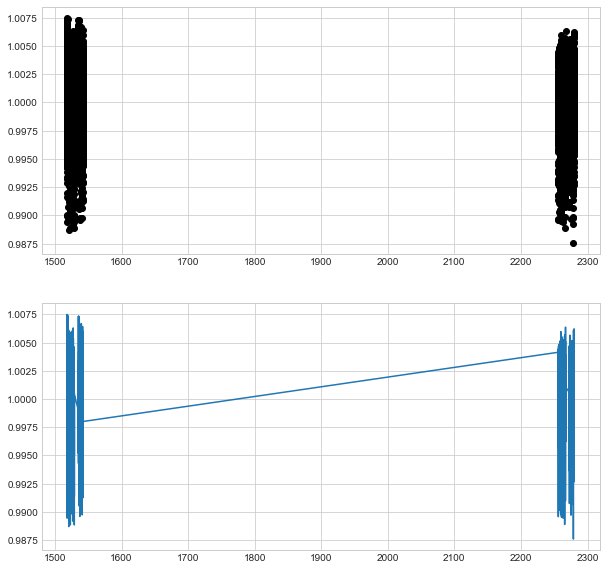

In [22]:
# all data are set, ready to graph
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
ax1.plot(cleaned_time, detrended_flux, 'o', color='black')
ax2.plot(cleaned_time, detrended_flux)


In [19]:
ax1.scatter(cleaned_time, detrended_flux)
